In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open("vendorMacs.xml", "r")
raw_file = f.read()

In [3]:
raw2_file = raw_file.split('>')

In [4]:
raw2_file.pop(0)
raw2_file.pop()
raw2_file.pop()
raw2_file[0]

'\n<VendorMapping mac_prefix="00:00:00" vendor_name="XEROX CORPORATION"/'

In [5]:
vendor_dict = {}
for line in raw2_file:
    prefix = line.split('mac_prefix="')
    prefix = prefix[1].split('"')
    vendor = line.split('vendor_name="')
    vendor = vendor[1].split('"')
    vendor_dict[prefix[0]] = vendor[0]

In [6]:
path = "myOutput5G-01.csv" # Path to the .csv file
flag = 0

with open(path) as file:
    table = csv.reader(file)
    rows  = list(table)[1:] # Step to remove st empty row
    aps   = []
    clients = []
    
    for data in rows:
        if not data: 
            flag = 1
        
        if not flag:
            aps.append(data)
        else:
            clients.append(data)
            

# clients.pop(0)
df_raw = pd.DataFrame(aps[1:], columns = rows[0])
ap_Macs_list = df_raw['BSSID'].values

clients_raw = pd.DataFrame(clients[1:])
clients_Macs_list = clients_raw[0].values

In [7]:
vendors = []
qnt = []
not_listed = 0
found = 0
for i in range(len(ap_Macs_list)):
    
        for j in range(13,7,-1):
            try:
                vendor = vendor_dict[ap_Macs_list[i][0:j]]
                found = 1
                if(vendor in vendors):
                    index = vendors.index(vendor)
                    qnt[index] += 1
                else:
                    vendors.append(vendor)
                    qnt.append(1)
                break
            except:
                pass
            
        if(not found):
            not_listed+=1
        found = 0
vendors.append('Não listado')
qnt.append(not_listed)

In [8]:
vendors_clients = []
qnt_clients = []
not_listed = 0
found = 0
for i in range(len(clients_Macs_list)):
    
        for j in range(13,7,-1):
            try:
                vendor = vendor_dict[clients_Macs_list[i][0:j]]
                found = 1
                if(vendor in vendors_clients):
                    index = vendors_clients.index(vendor)
                    qnt_clients[index] += 1
                else:
                    vendors_clients.append(vendor)
                    qnt_clients.append(1)
                break
            except:
                pass
            
        if(not found):
            not_listed+=1
        found = 0
vendors_clients.append('Não listado')
qnt_clients.append(not_listed)

In [9]:
final_mapping = list(zip(vendors, qnt))
final_mapping

[('MitraStar Technology Corp.', 7),
 ('Kaonmedia CO., LTD.', 8),
 ('TELLESCOM INDUSTRIA E COMERCIO EM TELECOMUNICACAO ', 7),
 ('ARRIS Group, Inc.', 7),
 ('Sagemcom Broadband SAS', 15),
 ('Ubiquiti Networks Inc.', 4),
 ('Inventus Power Eletronica do Brasil LTDA', 8),
 ('HUMAX Co., Ltd.', 11),
 ('SHENZHEN BILIAN ELECTRONIC CO.，LTD', 10),
 ('ESSYS', 3),
 ('Magneti Marelli Automotive Electronics (Guangzhou) Co. Ltd', 3),
 ('D-Link International', 1),
 ('Murata Manufacturing Co., Ltd.', 2),
 ('Panasonic Corporation Automotive', 5),
 ('Guangzhou Shiyuan Electronic Technology Company Limited', 2),
 ('ittim', 1),
 ('Intelbras', 6),
 ('Taicang TW Electronics', 1),
 ('zte corporation', 5),
 ('Google, Inc.', 1),
 ('Technicolor CH USA Inc.', 5),
 ('Qisda Corporation', 1),
 ('Nokia Shanghai Bell Co., Ltd.', 3),
 ('Tenda Technology Co.,Ltd.Dongguan branch', 1),
 ('SHENZHEN GONGJIN ELECTRONICS CO.,LT', 1),
 ('LG Innotek', 4),
 ('SHENZHEN RF-LINK TECHNOLOGY CO.,LTD.', 2),
 ('Barrot Technology Limited'

In [10]:
final_mapping_clients = list(zip(vendors_clients, qnt_clients))
final_mapping_clients

[('Apple, Inc.', 20),
 ('Xiaomi Communications Co Ltd', 18),
 ('Google, Inc.', 26),
 ('Motorola Mobility LLC, a Lenovo Company', 76),
 ('Ubiquiti Networks Inc.', 3),
 ('SAMSUNG ELECTRO-MECHANICS(THAILAND)', 3),
 ('Samsung Electronics Co.,Ltd', 6),
 ('Intel Corporate', 15),
 ('Texas Instruments', 4),
 ('MediaTek Inc.', 39),
 ('ASUSTek COMPUTER INC.', 3),
 ('Nintendo Co.,Ltd', 1),
 ('SHENZHEN BILIAN ELECTRONIC CO.，LTD', 6),
 ('Murata Manufacturing Co., Ltd.', 2),
 ('AMPAK Technology,Inc.', 3),
 ('LG Electronics (Mobile Communications)', 5),
 ('Hon Hai Precision Ind. Co.,Ltd.', 3),
 ('TELLESCOM INDUSTRIA E COMERCIO EM TELECOMUNICACAO ', 6),
 ('LG Innotek', 2),
 ('SMART Modular Technologies', 2),
 ('ARRIS Group, Inc.', 1),
 ('MitraStar Technology Corp.', 3),
 (' INGENICO TERMINALS SAS', 1),
 ('Custom Computer Services, Inc.', 1),
 ('SHENZHEN RF-LINK TECHNOLOGY CO.,LTD.', 2),
 ('Visteon Corporation', 1),
 ('Inventus Power Eletronica do Brasil LTDA', 7),
 ('Mobiwire Mobiles (NingBo) Co., LTD

/tmp/ipykernel_4482/2112263305.py:25: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  plt.savefig('result_5G.png')
/home/danilo/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


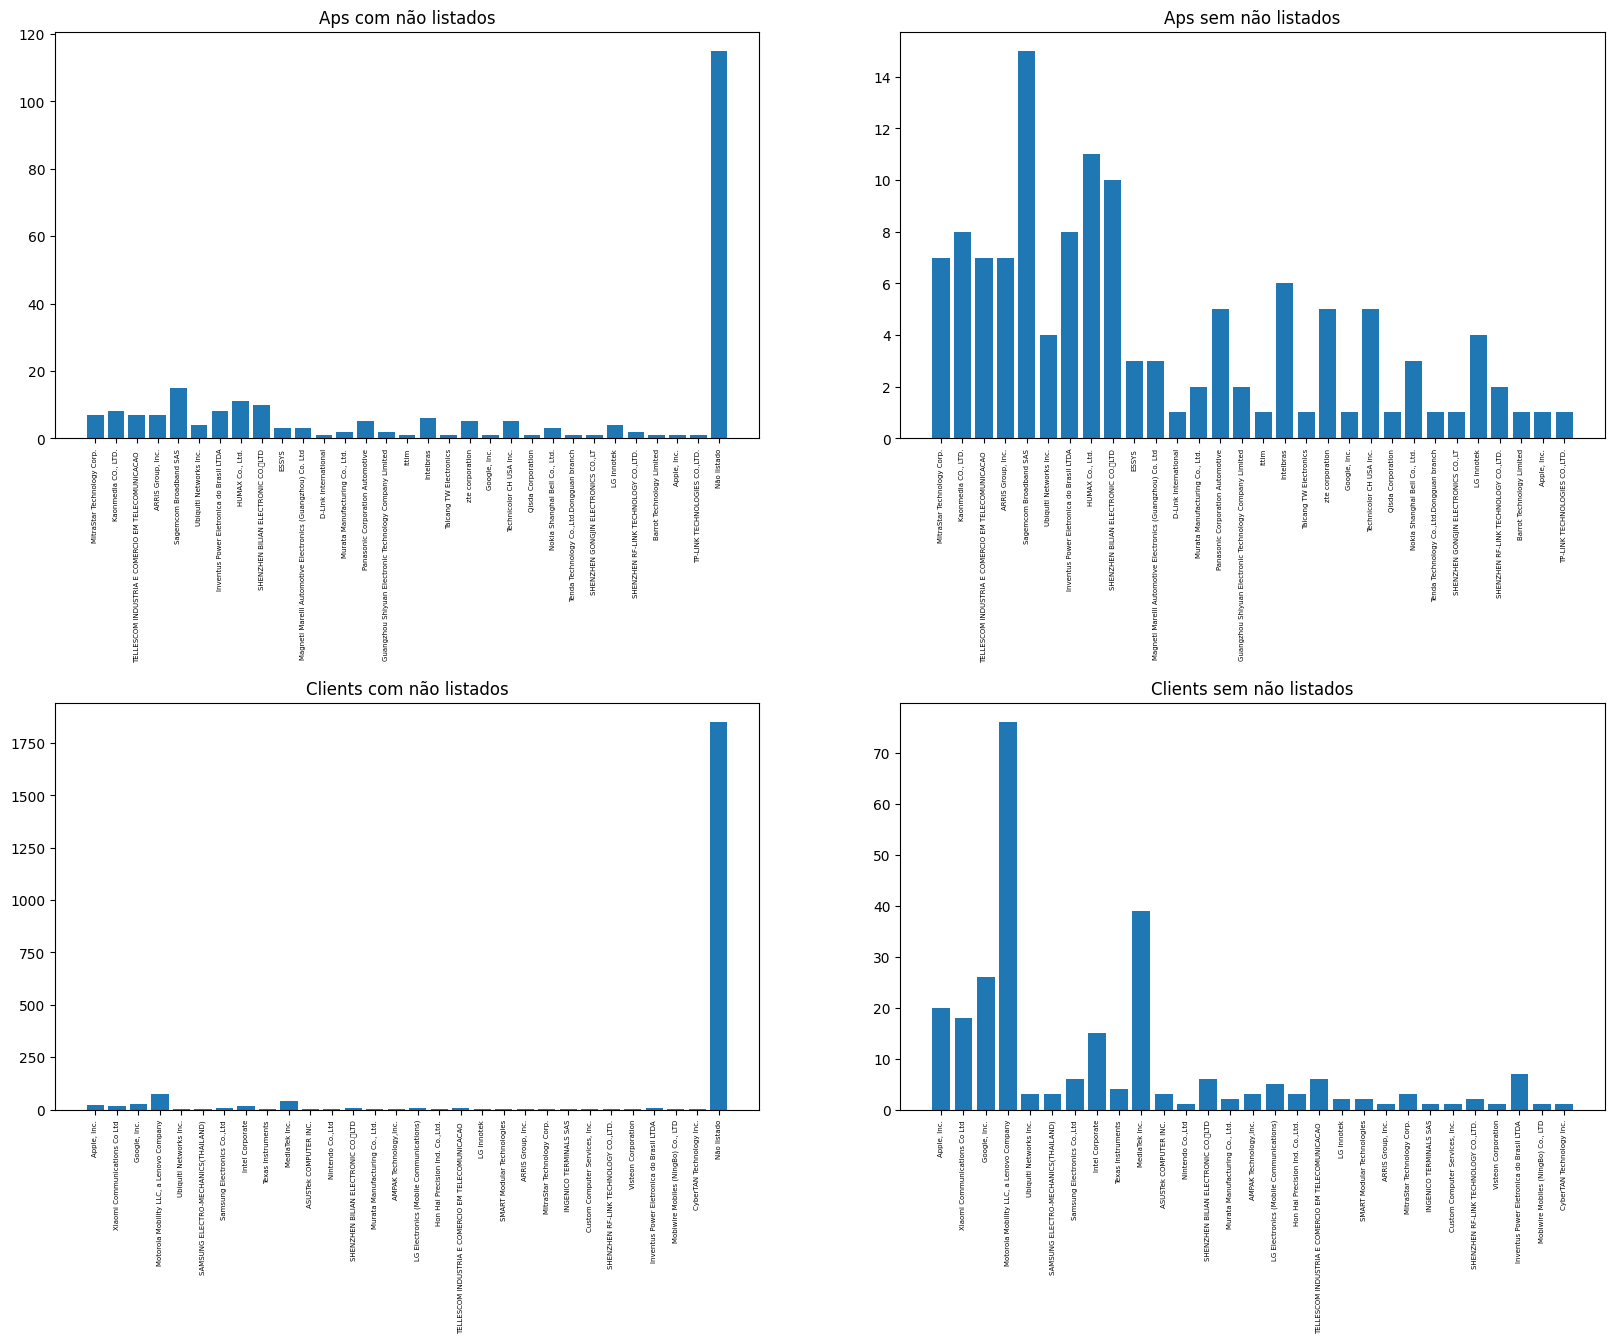

In [11]:
x = np.array(vendors)
y = np.array(qnt)

z = np.array(vendors_clients)
w = np.array(qnt_clients)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,14))
fig.subplots_adjust(hspace=0.65)


ax[0,0].bar(x,y)
ax[0,0].tick_params(axis='x', labelrotation=90, labelsize=5)
ax[0,0].set_title("Aps com não listados")
ax[0,1].bar(x[0:-1], y[0:-1])
ax[0,1].tick_params(axis='x', labelrotation=90, labelsize=5)
ax[0,1].set_title("Aps sem não listados")

ax[1,0].bar(z,w)
ax[1,0].tick_params(axis='x', labelrotation=90, labelsize=5)
ax[1,0].set_title("Clients com não listados")
ax[1,1].bar(z[0:-1], w[0:-1])
ax[1,1].tick_params(axis='x', labelrotation=90, labelsize=5)
ax[1,1].set_title("Clients sem não listados")

plt.savefig('result_5G.png')
plt.show()